In [42]:
# Convolutional autoencoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python import keras

img_rows, img_cols = 28, 28
num_classes = 10



In [52]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt


In [43]:
def prep_data(raw, train_size, val_size):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(-1, img_rows, img_cols,1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = "C:/Users/Leo/Desktop/Machine learning/DL_Practice/Fashion/fashionmnist/fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data, train_size=50000, val_size=5000)

In [45]:
tx = x 
ty = y

In [46]:
print(x.shape,y.shape)

(60000, 28, 28, 1) (60000, 10)


In [47]:
from keras.layers import Reshape, Flatten
input_img = Input(shape=(28,28,1))


x = Conv2D(8,(3,3),activation='relu',padding='same')(input_img)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Flatten()(x)
encoded = Dense(256,activation='relu')(x)

x = Dense(784,activation='relu')(encoded)
#784 --> 16,7,7
x = Reshape((7,7,16))(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

print(decoded.shape)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

(?, 28, 28, 1)


In [49]:
autoencoder.fit(tx[:55000],tx[:55000], epochs=50,
                verbose=2, batch_size=128, shuffle=True,
                validation_data=(tx[55000:],tx[55000:]))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
 - 18s - loss: 0.3368 - acc: 0.5006 - val_loss: 0.2876 - val_acc: 0.5063
Epoch 2/50
 - 13s - loss: 0.2838 - acc: 0.5071 - val_loss: 0.2792 - val_acc: 0.5074
Epoch 3/50
 - 13s - loss: 0.2778 - acc: 0.5077 - val_loss: 0.2747 - val_acc: 0.5080
Epoch 4/50
 - 13s - loss: 0.2748 - acc: 0.5080 - val_loss: 0.2737 - val_acc: 0.5079
Epoch 5/50
 - 13s - loss: 0.2725 - acc: 0.5083 - val_loss: 0.2703 - val_acc: 0.5087
Epoch 6/50
 - 12s - loss: 0.2708 - acc: 0.5084 - val_loss: 0.2684 - val_acc: 0.5087
Epoch 7/50
 - 11s - loss: 0.2695 - acc: 0.5085 - val_loss: 0.2686 - val_acc: 0.5090
Epoch 8/50
 - 12s - loss: 0.2685 - acc: 0.5086 - val_loss: 0.2668 - val_acc: 0.5088
Epoch 9/50
 - 13s - loss: 0.2676 - acc: 0.5087 - val_loss: 0.2666 - val_acc: 0.5088
Epoch 10/50
 - 13s - loss: 0.2668 - acc: 0.5088 - val_loss: 0.2651 - val_acc: 0.5091
Epoch 11/50
 - 13s - loss: 0.2662 - acc: 0.5088 - val_loss: 0.2655 - val_acc: 0.5089
Epoch 12/50
 - 13s - loss

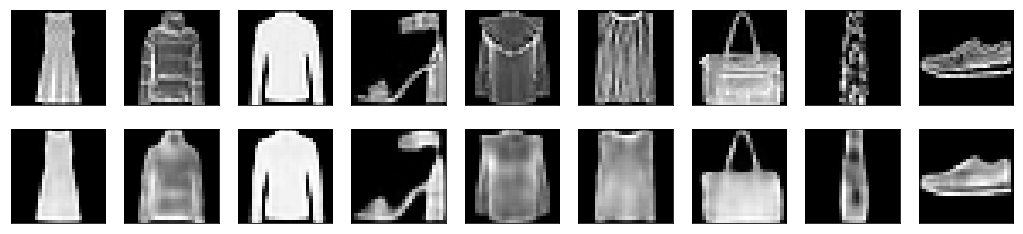

In [53]:
sep = 55000
decoded_imgs = autoencoder.predict(tx[sep:])

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(tx[sep+i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

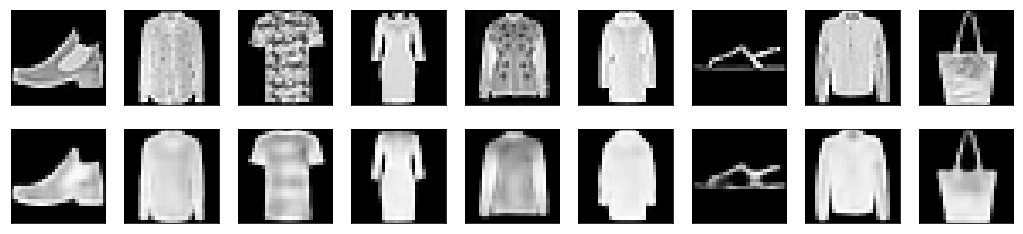

In [56]:
decoded_imgs = autoencoder.predict(tx[:10])

plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(tx[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

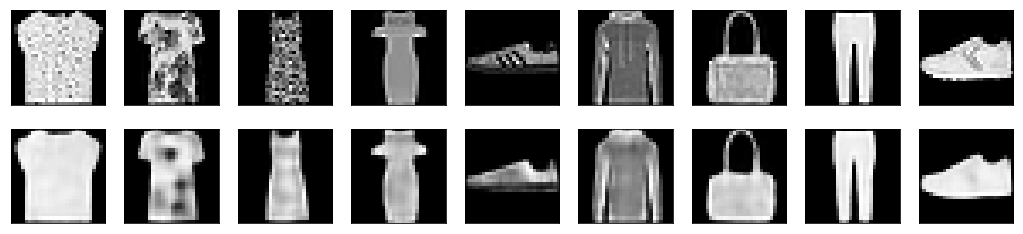

In [57]:
decoded_imgs = autoencoder.predict(tx[1000:1010])

plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(tx[1000+i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Theory
